# Using machine learning XGboost classifier to look for different pattern between Ketamin and Midazolam groups

In [6]:
# import relevant packages
import glob
import numpy as np
import scipy
import nilearn
import nilearn.plotting
import nilearn.input_data
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## No apperant contribution to before/after treatment in general. 
- Lets look at group differences in ROIs $\rightarrow$
    * Amygdala
    * vmPFC
    * Hippocampus
    * Striatum
- We compare pattern of ROI activation in the trauma > relax contrast on the 2nd day

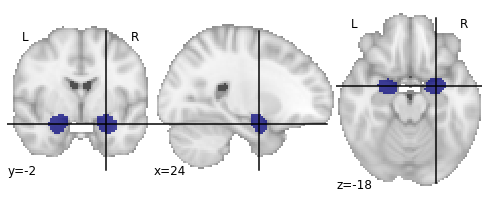

In [93]:
## Amygdala as mask
mask_file = '/media/Data/work/KPE_ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=21", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)


masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=1, standardize=False, detrend=False, verbose=5)

In [94]:
# compare between groups
import pandas as pd
medication_cond = pd.read_csv('/home/or/kpe_task_analysis/task_based_analysis/kpe_sub_condition.csv')


ketamine_list = list(medication_cond['scr_id'][medication_cond['med_cond']==1])
ket_list = []
for subject in ketamine_list:
    
    sub = subject.split('KPE')[1]
    ket_list.append(sub)


midazolam_list = list(medication_cond['scr_id'][medication_cond['med_cond']==0])
mid_list = []
for subject in midazolam_list:
    
    sub = subject.split('KPE')[1]
    mid_list.append(sub)
#mid_list.remove('1480')

In [33]:
ket_list
## only for 3rd session
#ket_list.remove('1315')

['008',
 '1223',
 '1293',
 '1307',
 '1315',
 '1322',
 '1339',
 '1343',
 '1387',
 '1464',
 '1499']

In [133]:
# only for 3rd session
#mid_list.remove('1253')
#mid_list.remove('1480')

In [98]:
ses = '2'
ket_func = ['/media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses%s/modelfit/_subject_id_%s/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz'% (ses,sub) for sub in ket_list]
mid_func = ['/media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses%s/modelfit/_subject_id_%s/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz' % (ses, sub) for sub in mid_list]

In [35]:
#ketamine_list.remove('KPE1315')
#mid_list.remove('1480')

In [99]:
ketamine = []
for func in ket_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    ketamine.append(beta)

midazolam = []
for func in mid_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    midazolam.append(beta)

ketArr = np.array(ketamine)
ketArr_reshape= np.array(ketArr).reshape(ketArr.shape[0], ketArr.shape[2])
ketArr_reshape.shape


midArr = np.array(midazolam)
midArr_reshape= np.array(midArr).reshape(midArr.shape[0], midArr.shape[2])
midArr_reshape.shape


## Create condition labels (1 = plus, 0 = minus)
label1 = [1] * ketArr.shape[0]
label2 = [0] * midArr.shape[0]
condition_label = np.concatenate([label1, label2])
condition_label

X = np.concatenate([ketArr, midArr])
X = X.reshape(X.shape[0], midArr_reshape.shape[1])
X.shape

Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses2/modelfit/_subject_id_008/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses2/modelfit/_subject_id_1223/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mas

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses2/modelfit/_subject_id_1263/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses2/modelfit/_subject_id_1351/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMas

(21, 846)

In [100]:
## Check correlation between sessions
ses2 = np.array(X)

(21, 846)

In [101]:
cor12= []
for i in range(ses1.shape[0]):
    corr = scipy.stats.pearsonr(ses1[i], ses2[i])
    cor12.append(corr[0])
corDF = pd.DataFrame({'condition':condition_label, 'cor': cor12})

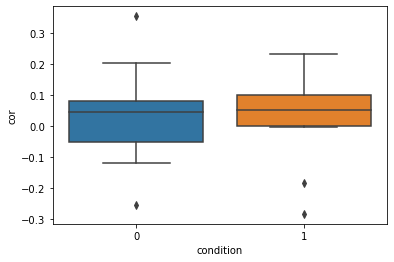

In [102]:
sns.boxplot(x='condition', y='cor', data=corDF)

In [103]:
#from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
model = XGBClassifier(n_jobs=5, 
                     verbose = 9, random_state=None)

## Here we use stratified K-fold with shuffling to generate different shuffling of leave one subject out
cv = StratifiedKFold(n_splits=10, shuffle=True) # running for each subject


In [104]:
scores = cross_val_score(model,
                            X,
                            y=condition_label,
                            cv=cv,
                            groups=condition_label,
                            scoring= "roc_auc",
                            n_jobs=1, # set number of CPUs
                            #verbose = 5 # set some details of the activity 
                            )

In [105]:
scores

array([0.5, 1. , 0.5, 1. , 0. , 1. , 1. , 1. , 1. , 1. ])

## Use shuffle split to randomize and run the XGboost N times
- This will create a distribution of estimation level 
- We can then better estimate how really its more accurate than chance


In [54]:
n_iter = 1000
rand_score = []
for i in range(n_iter):
    print(f' Running {i+1} iteration')
    mean_scores = []
    scores = cross_val_score(model,
                            X,
                            y=condition_label,
                            cv=cv,
                            groups=condition_label,
                            scoring= "accuracy",
                            n_jobs=1, # set number of CPUs
                            #verbose = 5 # set some details of the activity 
                            )
    mean_scores.append(scores.mean())
    rand_score.append(mean_scores)

 Running 1 iteration
 Running 2 iteration
 Running 3 iteration
 Running 4 iteration
 Running 5 iteration
 Running 6 iteration
 Running 7 iteration
 Running 8 iteration
 Running 9 iteration
 Running 10 iteration
 Running 11 iteration
 Running 12 iteration
 Running 13 iteration
 Running 14 iteration
 Running 15 iteration
 Running 16 iteration
 Running 17 iteration
 Running 18 iteration
 Running 19 iteration
 Running 20 iteration
 Running 21 iteration
 Running 22 iteration
 Running 23 iteration
 Running 24 iteration
 Running 25 iteration
 Running 26 iteration
 Running 27 iteration
 Running 28 iteration
 Running 29 iteration
 Running 30 iteration
 Running 31 iteration
 Running 32 iteration
 Running 33 iteration
 Running 34 iteration
 Running 35 iteration
 Running 36 iteration
 Running 37 iteration
 Running 38 iteration
 Running 39 iteration
 Running 40 iteration
 Running 41 iteration
 Running 42 iteration
 Running 43 iteration
 Running 44 iteration
 Running 45 iteration
 Running 46 iterati

 Running 362 iteration
 Running 363 iteration
 Running 364 iteration
 Running 365 iteration
 Running 366 iteration
 Running 367 iteration
 Running 368 iteration
 Running 369 iteration
 Running 370 iteration
 Running 371 iteration
 Running 372 iteration
 Running 373 iteration
 Running 374 iteration
 Running 375 iteration
 Running 376 iteration
 Running 377 iteration
 Running 378 iteration
 Running 379 iteration
 Running 380 iteration
 Running 381 iteration
 Running 382 iteration
 Running 383 iteration
 Running 384 iteration
 Running 385 iteration
 Running 386 iteration
 Running 387 iteration
 Running 388 iteration
 Running 389 iteration
 Running 390 iteration
 Running 391 iteration
 Running 392 iteration
 Running 393 iteration
 Running 394 iteration
 Running 395 iteration
 Running 396 iteration
 Running 397 iteration
 Running 398 iteration
 Running 399 iteration
 Running 400 iteration
 Running 401 iteration
 Running 402 iteration
 Running 403 iteration
 Running 404 iteration
 Running 40

 Running 719 iteration
 Running 720 iteration
 Running 721 iteration
 Running 722 iteration
 Running 723 iteration
 Running 724 iteration
 Running 725 iteration
 Running 726 iteration
 Running 727 iteration
 Running 728 iteration
 Running 729 iteration
 Running 730 iteration
 Running 731 iteration
 Running 732 iteration
 Running 733 iteration
 Running 734 iteration
 Running 735 iteration
 Running 736 iteration
 Running 737 iteration
 Running 738 iteration
 Running 739 iteration
 Running 740 iteration
 Running 741 iteration
 Running 742 iteration
 Running 743 iteration
 Running 744 iteration
 Running 745 iteration
 Running 746 iteration
 Running 747 iteration
 Running 748 iteration
 Running 749 iteration
 Running 750 iteration
 Running 751 iteration
 Running 752 iteration
 Running 753 iteration
 Running 754 iteration
 Running 755 iteration
 Running 756 iteration
 Running 757 iteration
 Running 758 iteration
 Running 759 iteration
 Running 760 iteration
 Running 761 iteration
 Running 76

### Plotting area under ROC curve ditribution and printing average and standard deviation of the distribution

Area under curve: 0.69 (+/- 0.11)
90% CI is [0.6        0.76666667]


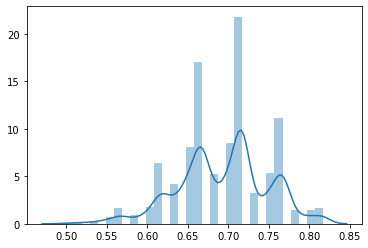

In [106]:
rand_score = np.array(rand_score)
print("Area under curve: %0.2f (+/- %0.2f)" % (np.mean(rand_score), np.std(rand_score) * 2))
print(f'90% CI is {np.quantile(rand_score, [0.05, 0.95])}')
sns.distplot(rand_score)

In [107]:
## use sklearn permutation test
from sklearn.model_selection import permutation_test_score
score, permutation_scores, pvalue = permutation_test_score(
    model, X, condition_label, scoring="roc_auc", cv=cv, n_permutations=100, n_jobs=5, verbose=5)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   13.6s


Classification score 0.7 (pvalue : 0.22772277227722773)


[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   21.0s finished


## Now we will do similar thing - just shuffling the condition label (Y) so we basically randomizing the lables
This should generate a chance level prediction

In [ ]:
## Lets do permutation tests - shuffling the condition label
import random
condPerm = np.array(condition_label)
permScor = []
#cv = KFold(n_splits=10)
for i in range(n_iter):
    print (f'Running the {i+1} iteration')
    random.shuffle(condPerm)
    print(condPerm)
    
    mean_scores = []
    cv_scores = cross_val_score(model,
                            X,
                            y=condPerm,
                            cv=cv,
                            groups=condPerm,
                            scoring="f1",#"roc_auc",
                            n_jobs=11, # set number of CPUs
                            #verbose = 5 # set some details of the activity 
                            )
    mean_scores.append(cv_scores.mean())
    permScor.append(mean_scores)

In [ ]:
# now lets see the mean score
score = np.array(permScor)

#import matplotlib.pyplot as plt
plt.hist(score)
print(f' Mean of permutation score is {np.mean(score)}')

In [ ]:
#plot permutation histogram and real one
plt.hist(score, color="blue")
plt.hist(rand_score, color="red")
# chances of getting our score
print(f' Chances of mean permutation score to be random is {len(score[score>=np.mean(rand_score)])/len(score)}')

In [ ]:

sns.distplot(score, hist=True, rug=True)
sns.distplot(rand_score, hist=True, rug=True)

In [ ]:
weights = np.ones_like(score) / len(score)
weights_real = np.ones_like(rand_score) / len(rand_score)
plt.hist(score, weights=weights)
plt.hist(rand_score, weights=weights_real)

## Lets plot each group's array to see the pattern of activation

In [55]:
## check maximum and minimum values
np.min(midArr_reshape)

-351.12814

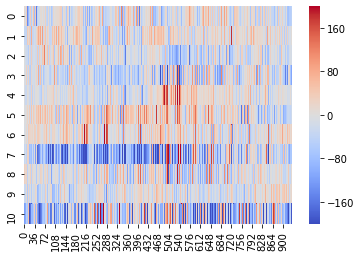

In [57]:

#plt.figure(figsize=(30,10))
sns.heatmap(ketArr_reshape, cmap="coolwarm", vmax=200, vmin = -200)#,linewidth=0.1)
plt.show()
#plt.imshow(ketArr_reshape, axis=0), cmap = "hot")

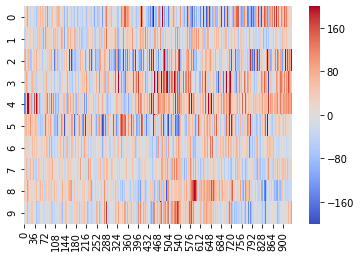

In [58]:
#plt.figure(figsize=(30,10))
sns.heatmap(midArr_reshape, cmap="coolwarm",vmax=200, vmin = -200)#,linewidth=0.1)
plt.show()

### plot average pattern for each group
- Ketamin


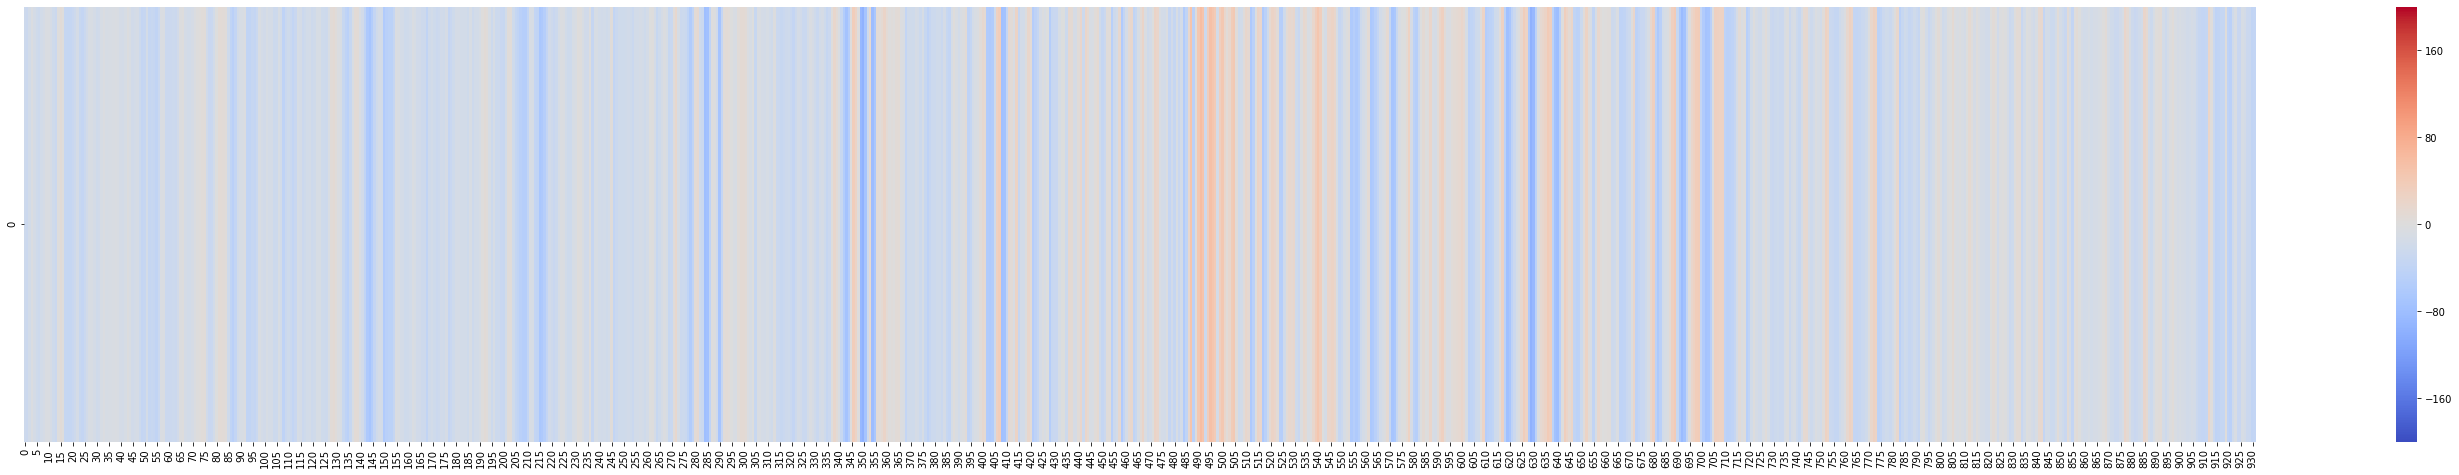

In [59]:
plt.figure(figsize=(50,8))
sns.heatmap([np.mean(ketArr_reshape, axis=0)],cmap="coolwarm",vmax=200, vmin = -200 )

- Midazolam

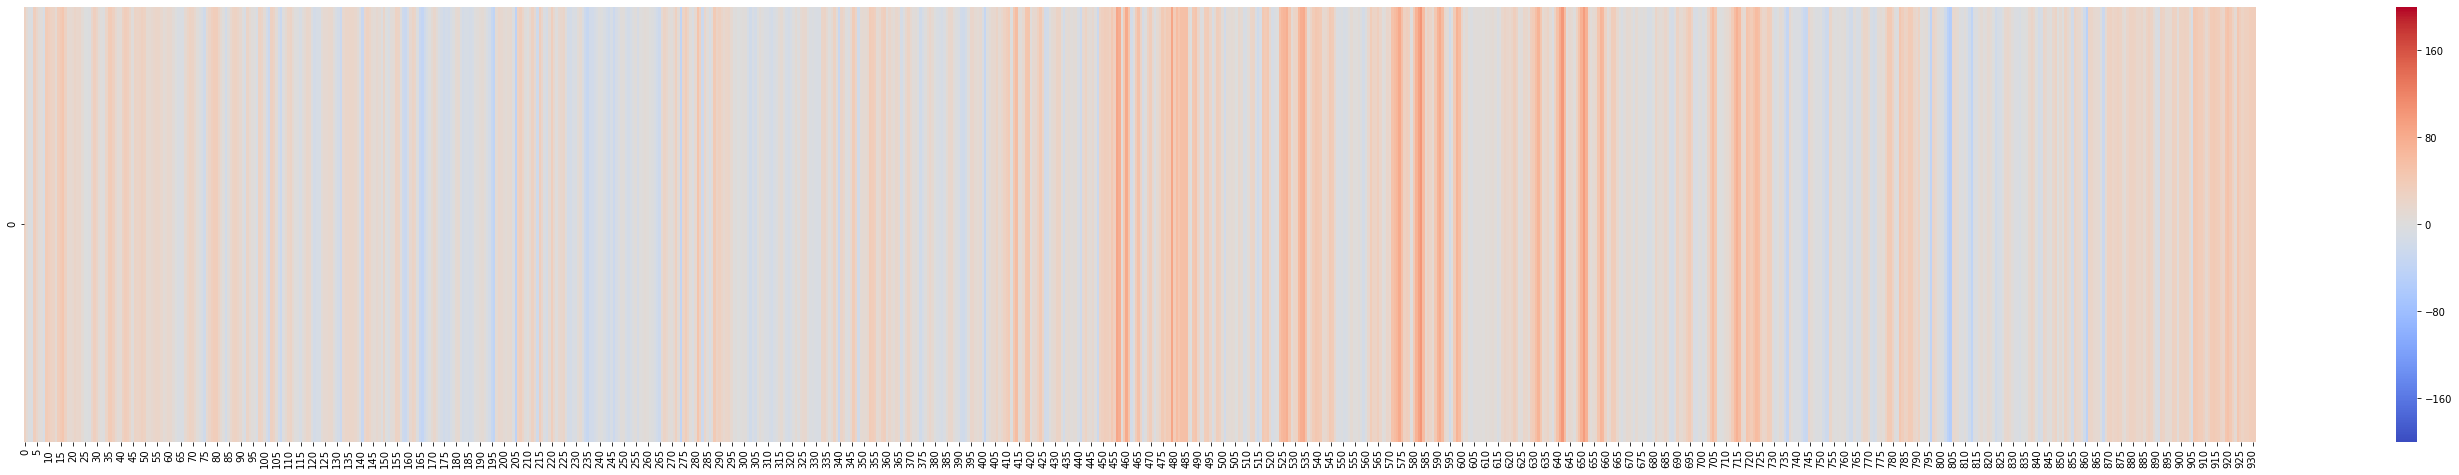

In [60]:
plt.figure(figsize=(50,8))
sns.heatmap([np.mean(midArr_reshape, axis=0)],cmap="coolwarm",vmax=200, vmin = -200 )

In [ ]:
deltaKetminusMid = np.mean(ketArr_reshape, axis=0) - np.mean(midArr_reshape, axis=0)
np.mean(deltaKetminusMid)

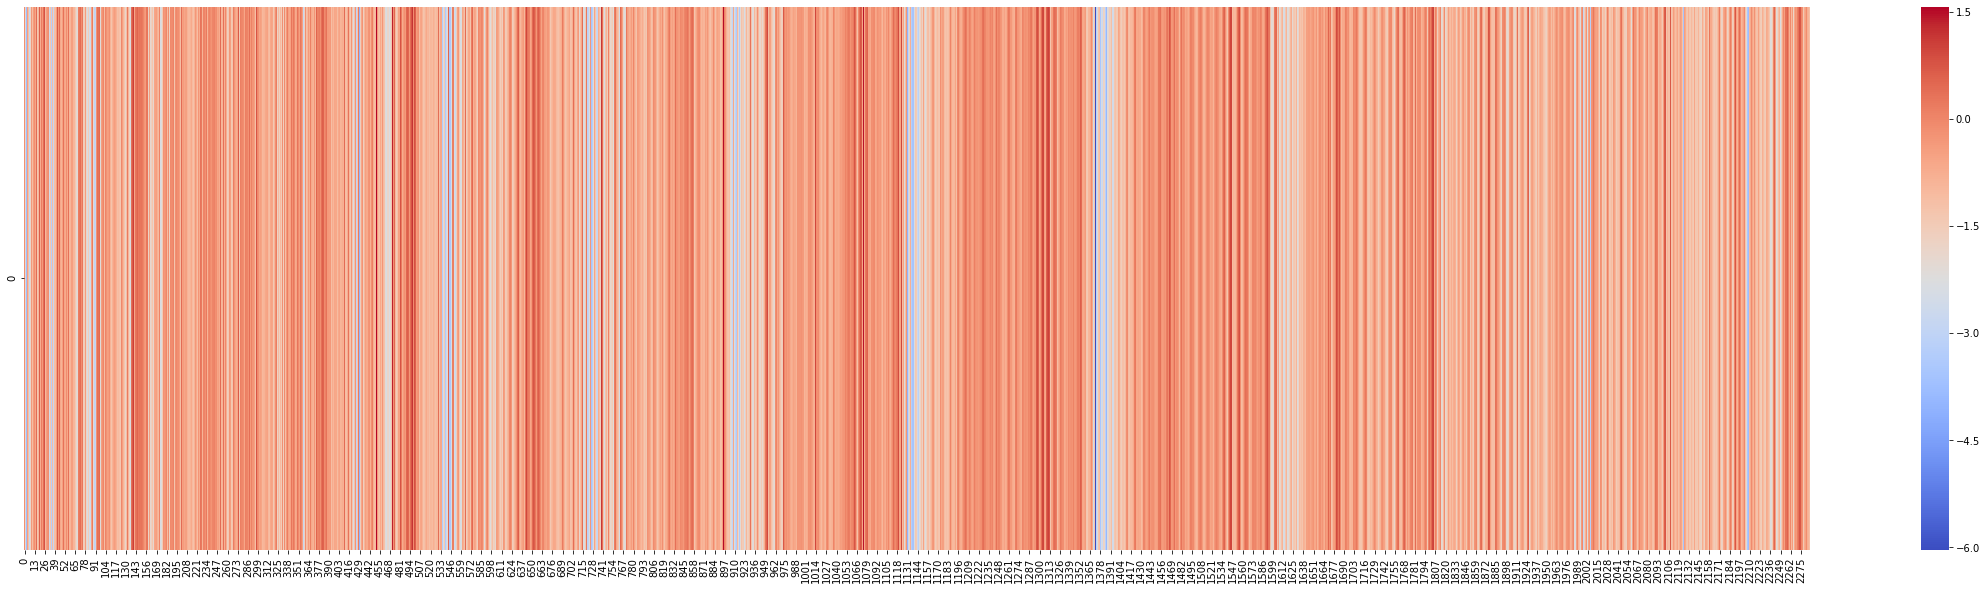

In [171]:
# t test
tTestArr = scipy.stats.ttest_ind(ketArr_reshape, midArr_reshape,  equal_var=True, nan_policy='propagate')
plt.figure(figsize=(40,10))
sns.heatmap([tTestArr[0]], cmap="coolwarm")

## show the t-test difference between the groups

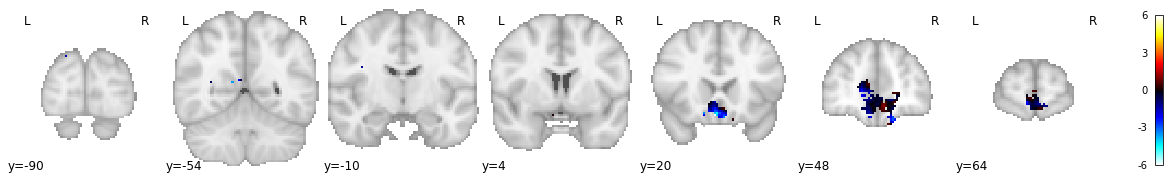

In [173]:
# turn back to brain?
img = masker.inverse_transform(tTestArr[0])
nilearn.plotting.plot_stat_map(img, display_mode='y', threshold=0)

## Plot amygdala pattern in each group

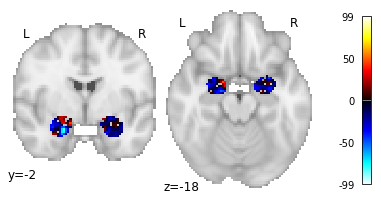

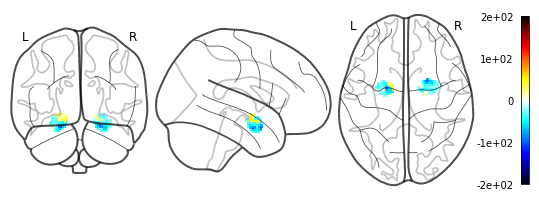

In [63]:
img_ket = masker.inverse_transform(np.mean(ketArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_ket, threshold=1.5, display_mode='yz', draw_cross=False, 
                           cut_coords=[-2,-18],colorbar=True, vmax=99)  
nilearn.plotting.plot_glass_brain(img_ket, vmin = -200, vmax = 200, colorbar=True, plot_abs=False)

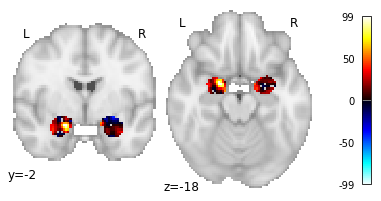

In [64]:
img_mid = masker.inverse_transform(np.mean(midArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_mid, threshold=1.5, display_mode='yz', draw_cross=False, 
                           cut_coords=[-2,-18],colorbar=True, vmax=99)


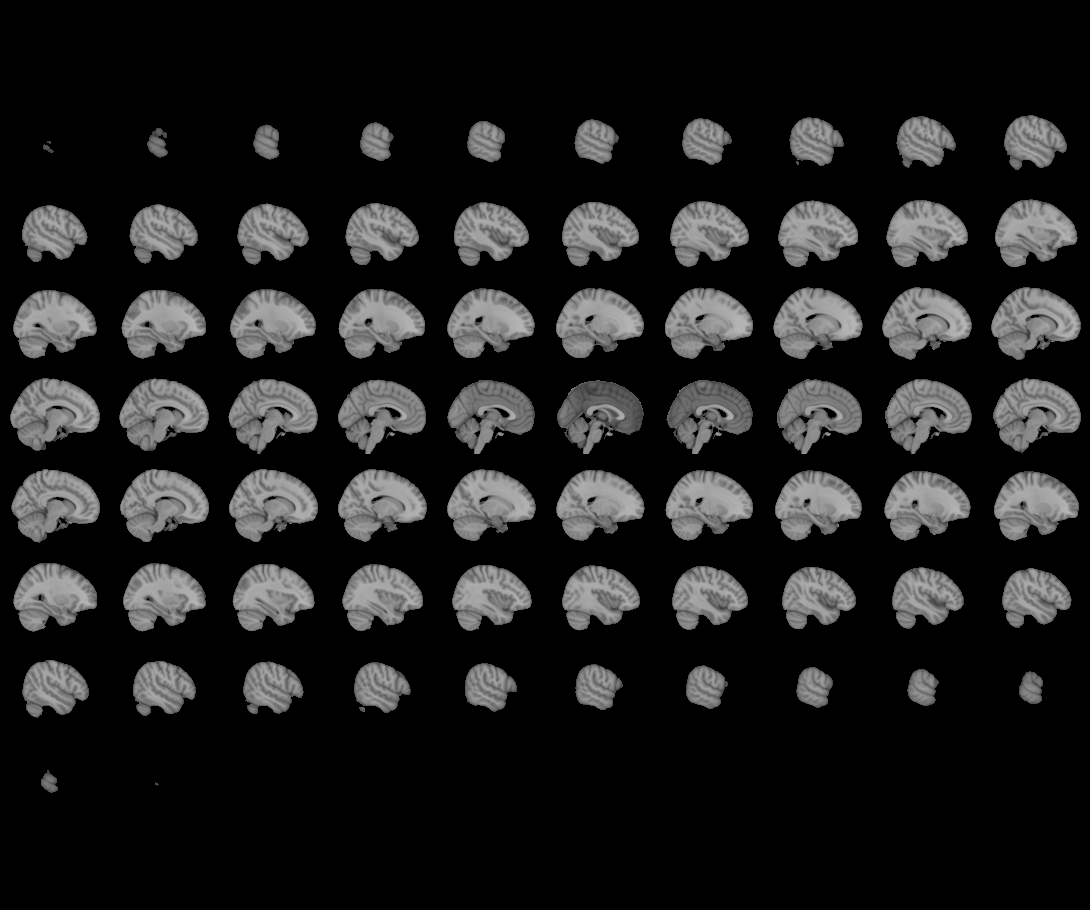
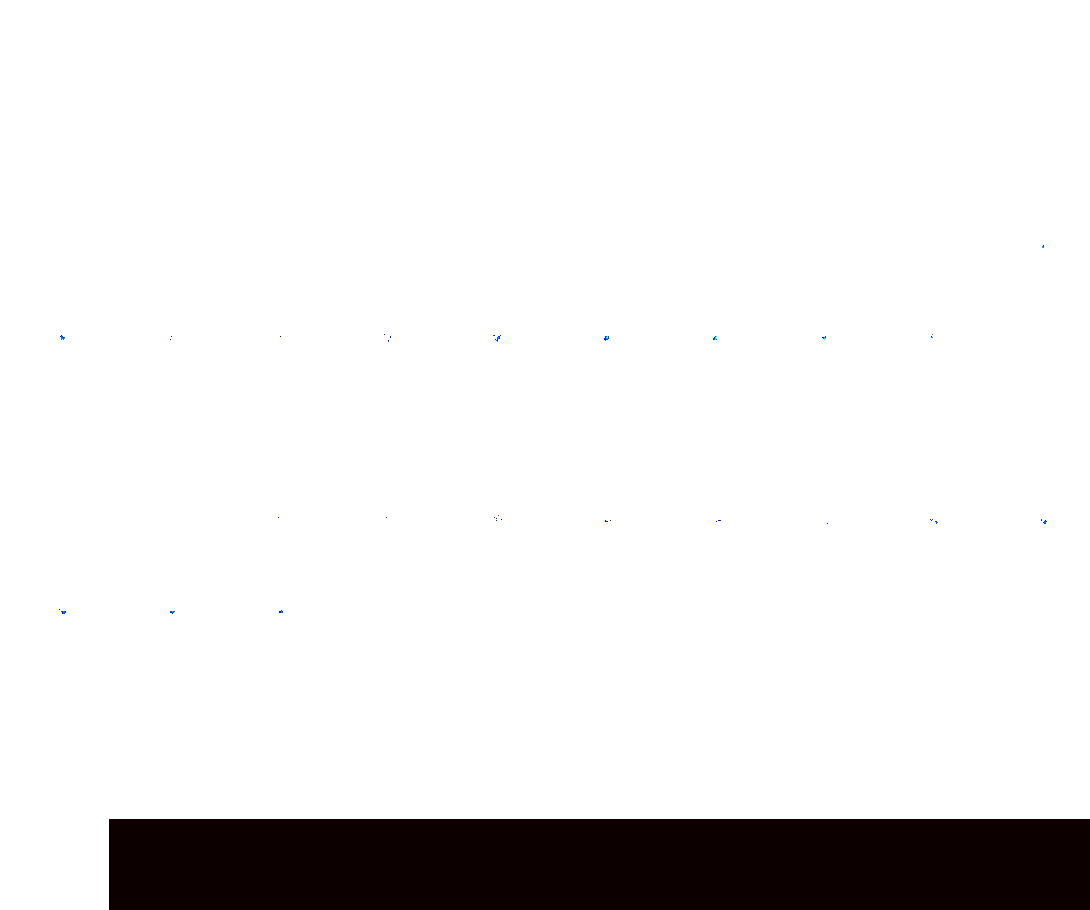

In [65]:
# another trial of interactive plottive  
view = nilearn.plotting.view_img(img, threshold=2, title="Ketamine - Midazolam Amygdala")
view

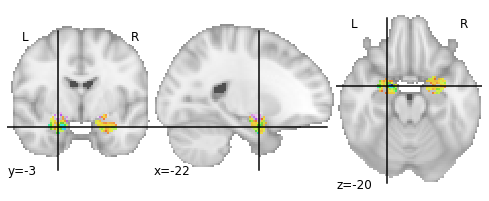

In [67]:
nilearn.plotting.plot_roi(img)

## Now we do similar thing but with vmPFC 
As it might be involved in regular (no reconsolidated) extinction learning

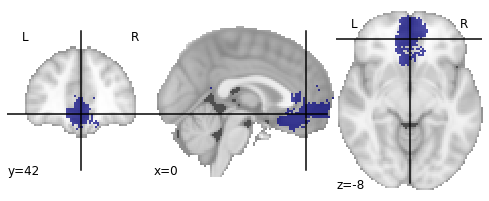

In [161]:
mask_file = '/media/Data/work/RCF_or/vmpfc_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=5", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=4, standardize=False, detrend=False, verbose=5)

In [162]:
ketamine = []
for func in ket_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    ketamine.append(beta)

midazolam = []
for func in mid_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    midazolam.append(beta)

ketArr = np.array(ketamine)
ketArr_reshape= np.array(ketArr).reshape(ketArr.shape[0], ketArr.shape[2])
ketArr_reshape.shape


midArr = np.array(midazolam)
midArr_reshape= np.array(midArr).reshape(midArr.shape[0], midArr.shape[2])
midArr_reshape.shape


## Create condition labels (1 = plus, 0 = minus)
label1 = [1] * ketArr.shape[0]
label2 = [0] * midArr.shape[0]
condition_label = np.concatenate([label1, label2])
condition_label

X = np.concatenate([ketArr, midArr])
X = X.reshape(X.shape[0], midArr_reshape.shape[1])
X.shape

Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_008/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1223/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mas

[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1356/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  


(17, 2287)

In [163]:
n_iter = 1000
rand_score = []
for i in range(n_iter):
    print(f' Running {i+1} iteration')
    mean_scores = []
    scores = cross_val_score(model,
                            X,
                            y=condition_label,
                            cv=cv,
                            groups=condition_label,
                            scoring= "accuracy",#"roc_auc",
                            n_jobs=1, # set number of CPUs
                            
                            )
    mean_scores.append(scores.mean())
    rand_score.append(mean_scores)

 Running 1 iteration
 Running 2 iteration
 Running 3 iteration
 Running 4 iteration
 Running 5 iteration
 Running 6 iteration
 Running 7 iteration
 Running 8 iteration
 Running 9 iteration
 Running 10 iteration
 Running 11 iteration
 Running 12 iteration
 Running 13 iteration
 Running 14 iteration
 Running 15 iteration
 Running 16 iteration
 Running 17 iteration
 Running 18 iteration
 Running 19 iteration
 Running 20 iteration
 Running 21 iteration
 Running 22 iteration
 Running 23 iteration
 Running 24 iteration
 Running 25 iteration
 Running 26 iteration
 Running 27 iteration
 Running 28 iteration
 Running 29 iteration
 Running 30 iteration
 Running 31 iteration
 Running 32 iteration
 Running 33 iteration
 Running 34 iteration
 Running 35 iteration
 Running 36 iteration
 Running 37 iteration
 Running 38 iteration
 Running 39 iteration
 Running 40 iteration
 Running 41 iteration
 Running 42 iteration
 Running 43 iteration
 Running 44 iteration
 Running 45 iteration
 Running 46 iterati

 Running 362 iteration
 Running 363 iteration
 Running 364 iteration
 Running 365 iteration
 Running 366 iteration
 Running 367 iteration
 Running 368 iteration
 Running 369 iteration
 Running 370 iteration
 Running 371 iteration
 Running 372 iteration
 Running 373 iteration
 Running 374 iteration
 Running 375 iteration
 Running 376 iteration
 Running 377 iteration
 Running 378 iteration
 Running 379 iteration
 Running 380 iteration
 Running 381 iteration
 Running 382 iteration
 Running 383 iteration
 Running 384 iteration
 Running 385 iteration
 Running 386 iteration
 Running 387 iteration
 Running 388 iteration
 Running 389 iteration
 Running 390 iteration
 Running 391 iteration
 Running 392 iteration
 Running 393 iteration
 Running 394 iteration
 Running 395 iteration
 Running 396 iteration
 Running 397 iteration
 Running 398 iteration
 Running 399 iteration
 Running 400 iteration
 Running 401 iteration
 Running 402 iteration
 Running 403 iteration
 Running 404 iteration
 Running 40

 Running 719 iteration
 Running 720 iteration
 Running 721 iteration
 Running 722 iteration
 Running 723 iteration
 Running 724 iteration
 Running 725 iteration
 Running 726 iteration
 Running 727 iteration
 Running 728 iteration
 Running 729 iteration
 Running 730 iteration
 Running 731 iteration
 Running 732 iteration
 Running 733 iteration
 Running 734 iteration
 Running 735 iteration
 Running 736 iteration
 Running 737 iteration
 Running 738 iteration
 Running 739 iteration
 Running 740 iteration
 Running 741 iteration
 Running 742 iteration
 Running 743 iteration
 Running 744 iteration
 Running 745 iteration
 Running 746 iteration
 Running 747 iteration
 Running 748 iteration
 Running 749 iteration
 Running 750 iteration
 Running 751 iteration
 Running 752 iteration
 Running 753 iteration
 Running 754 iteration
 Running 755 iteration
 Running 756 iteration
 Running 757 iteration
 Running 758 iteration
 Running 759 iteration
 Running 760 iteration
 Running 761 iteration
 Running 76

Area under curve: 0.94 (+/- 0.02)
90% CI is [0.92857143 0.95238095]


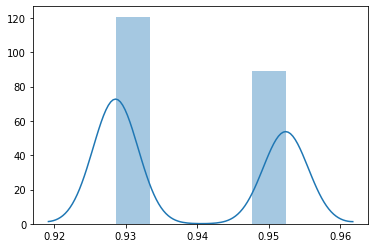

In [164]:
rand_score = np.array(rand_score)
print("Area under curve: %0.2f (+/- %0.2f)" % (np.mean(rand_score), np.std(rand_score) * 2))
print(f'90% CI is {np.quantile(rand_score, [0.05, 0.95])}')
sns.distplot(rand_score)

In [165]:
## use sklearn permutation test
from sklearn.model_selection import permutation_test_score
score, permutation_scores, pvalue = permutation_test_score(
    model, X, condition_label, scoring="accuracy", cv=cv, n_permutations=500, n_jobs=1, verbose=5)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


Classification score 0.9285714285714286 (pvalue : 0.013972055888223553)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.6min finished


## Same method does somehow discriminate between midazolam and ketamine group


### Let's look at the pattern of activation

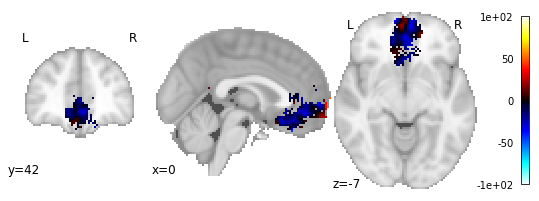

In [168]:
img_ket = masker.inverse_transform(np.mean(ketArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_ket, threshold=1, display_mode='ortho', draw_cross=False, 
                          cut_coords=[0,42,-7], colorbar=True, vmax=100)

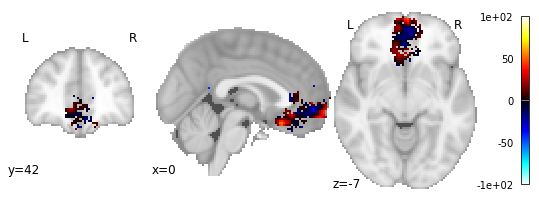

In [175]:
img_mid = masker.inverse_transform(np.mean(midArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_mid, threshold=1.5, display_mode='ortho', draw_cross=False, 
                          cut_coords=[0,42,-7], colorbar=True, vmax=100)

Seems like midazolam presents higher activation in some regions of the vmPFC.

This supports the idea of ketamine as promoting reconsolidation, while midazolam patients recovery is more associated with the typical, yet transient extinction.

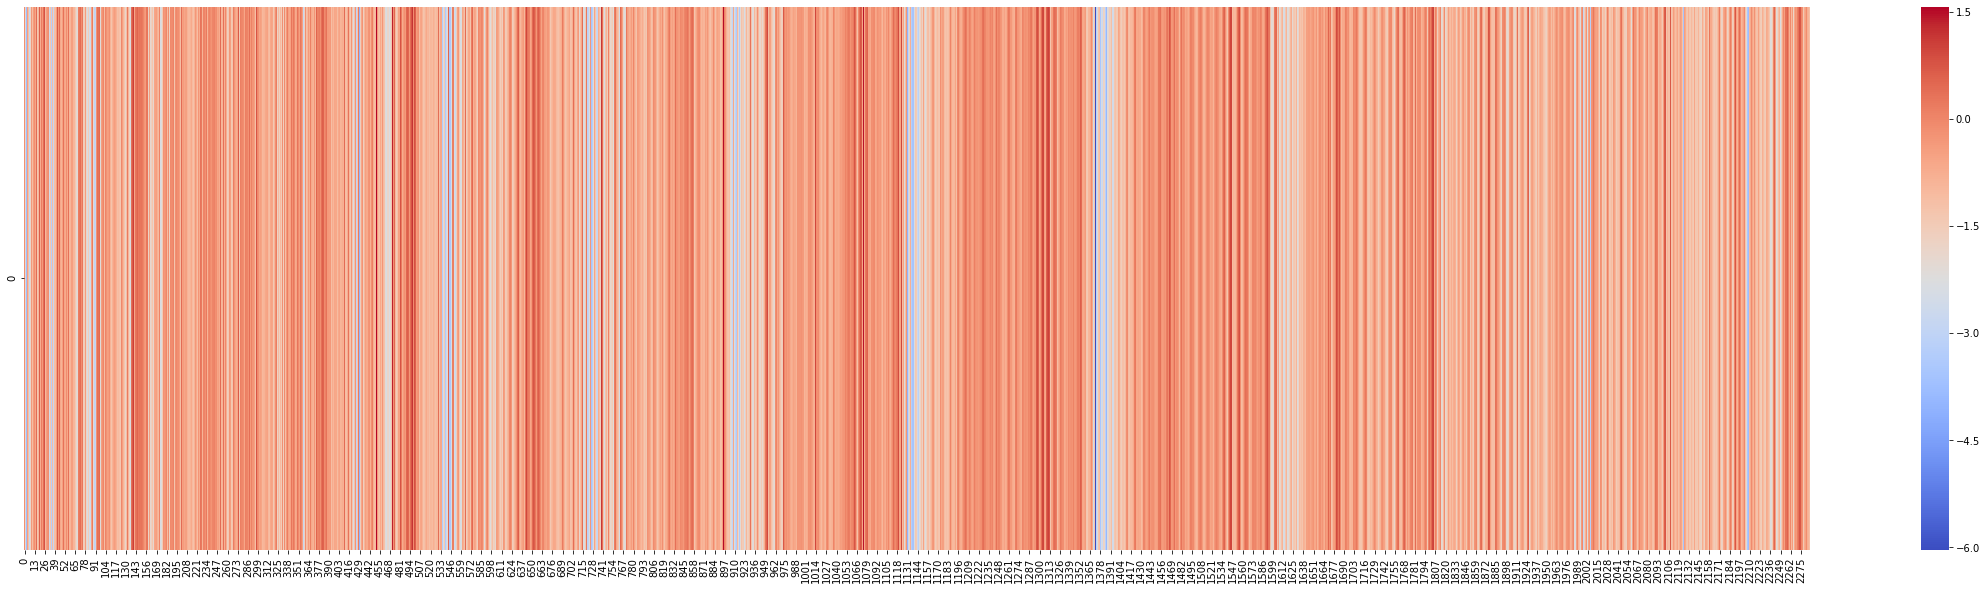

In [176]:
# t test
tTestArr = scipy.stats.ttest_ind(ketArr_reshape, midArr_reshape,  equal_var=True, nan_policy='propagate')
plt.figure(figsize=(40,10))
sns.heatmap([tTestArr[0]], cmap="coolwarm")

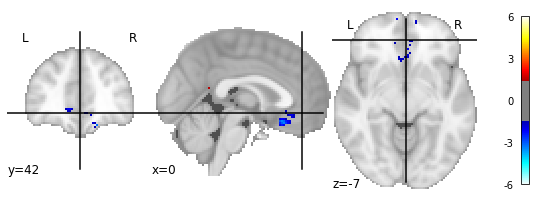

In [180]:
# turn back to brain?
img = masker.inverse_transform(tTestArr[0])
nilearn.plotting.plot_stat_map(img, display_mode='ortho',cut_coords=[0,42,-7], threshold=1.5)


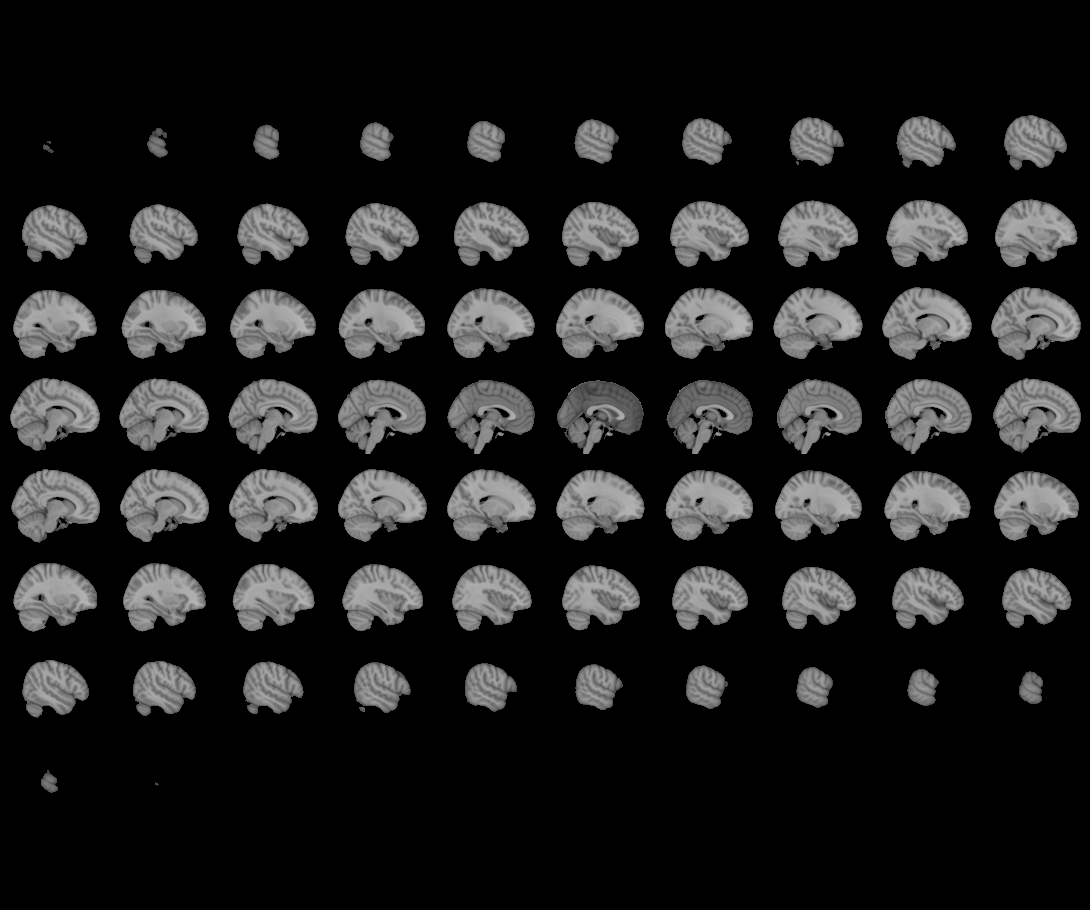
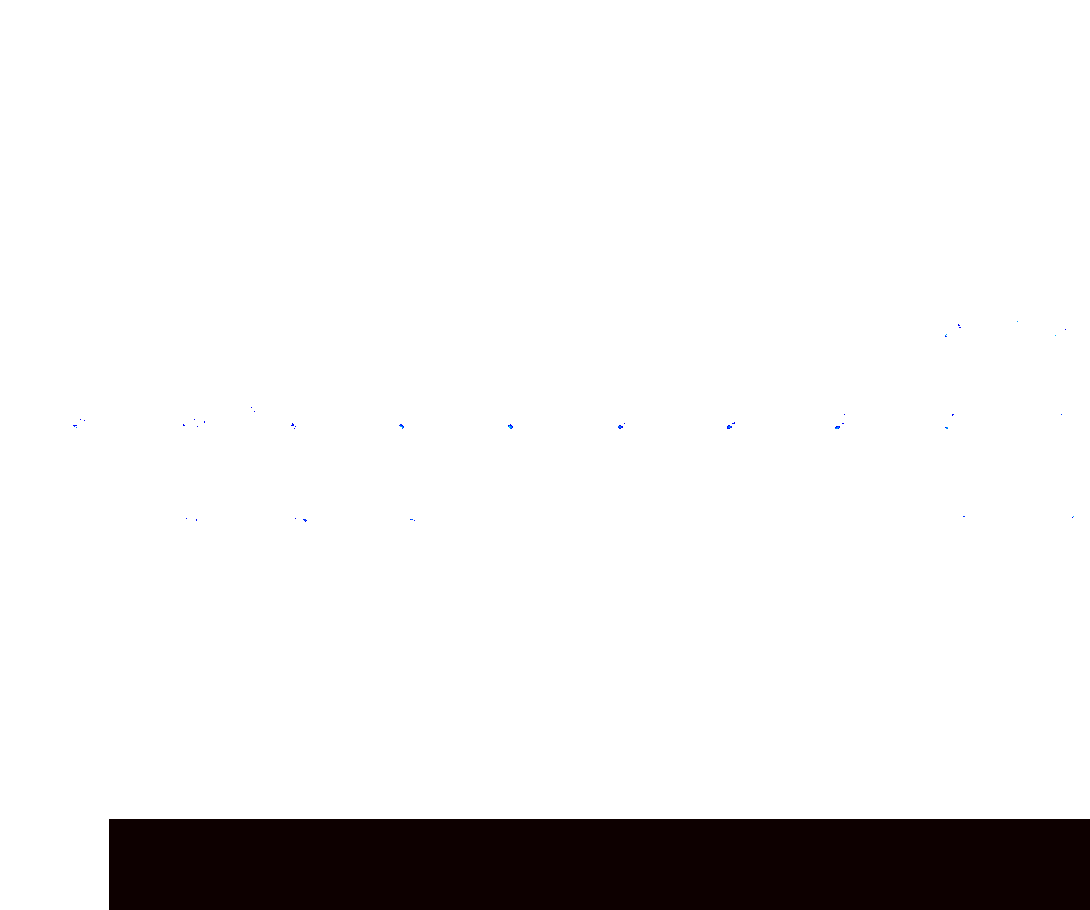

In [181]:
nilearn.plotting.view_img(img, threshold=2, title="Ketamine - Midazolam VMpfc")

## Lets look at the hippocampus

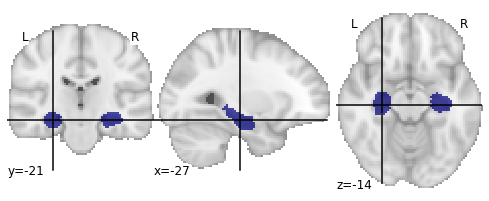

In [149]:
mask_file = '/media/Data/work/KPE_ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=13", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=4, standardize=False, detrend=False, verbose=5)

In [150]:
## run all analysis in one cell
ketamine = []
for func in ket_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    ketamine.append(beta)
midazolam = []
for func in mid_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    midazolam.append(beta)
ketArr = np.array(ketamine)
ketArr_reshape= np.array(ketArr).reshape(ketArr.shape[0], ketArr.shape[2])
ketArr_reshape.shape
midArr = np.array(midazolam)
midArr_reshape= np.array(midArr).reshape(midArr.shape[0], midArr.shape[2])
midArr_reshape.shape


Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_008/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1223/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mas

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1356/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1364/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMas

(7, 1265)

In [151]:
## Create condition labels (1 = plus, 0 = minus)
label1 = [1] * ketArr.shape[0]
label2 = [0] * midArr.shape[0]
condition_label = np.concatenate([label1, label2])
condition_label

X = np.concatenate([ketArr, midArr])
X = X.reshape(X.shape[0], midArr_reshape.shape[1])
X.shape

n_iter = 1000
rand_score = []
for i in range(n_iter):
    print(f' Running {i+1} iteration')
    mean_scores = []
    scores = cross_val_score(model,
                            X,
                            y=condition_label,
                            cv=cv,
                            groups=condition_label,
                            scoring= "accuracy",
                            n_jobs=1, # set number of CPUs
                            #verbose = 5 # set some details of the activity 
                            )
    mean_scores.append(scores.mean())
    rand_score.append(mean_scores)

 Running 1 iteration
 Running 2 iteration
 Running 3 iteration
 Running 4 iteration
 Running 5 iteration
 Running 6 iteration
 Running 7 iteration
 Running 8 iteration
 Running 9 iteration
 Running 10 iteration
 Running 11 iteration
 Running 12 iteration
 Running 13 iteration
 Running 14 iteration
 Running 15 iteration
 Running 16 iteration
 Running 17 iteration
 Running 18 iteration
 Running 19 iteration
 Running 20 iteration
 Running 21 iteration
 Running 22 iteration
 Running 23 iteration
 Running 24 iteration
 Running 25 iteration
 Running 26 iteration
 Running 27 iteration
 Running 28 iteration
 Running 29 iteration
 Running 30 iteration
 Running 31 iteration
 Running 32 iteration
 Running 33 iteration
 Running 34 iteration
 Running 35 iteration
 Running 36 iteration
 Running 37 iteration
 Running 38 iteration
 Running 39 iteration
 Running 40 iteration
 Running 41 iteration
 Running 42 iteration
 Running 43 iteration
 Running 44 iteration
 Running 45 iteration
 Running 46 iterati

 Running 362 iteration
 Running 363 iteration
 Running 364 iteration
 Running 365 iteration
 Running 366 iteration
 Running 367 iteration
 Running 368 iteration
 Running 369 iteration
 Running 370 iteration
 Running 371 iteration
 Running 372 iteration
 Running 373 iteration
 Running 374 iteration
 Running 375 iteration
 Running 376 iteration
 Running 377 iteration
 Running 378 iteration
 Running 379 iteration
 Running 380 iteration
 Running 381 iteration
 Running 382 iteration
 Running 383 iteration
 Running 384 iteration
 Running 385 iteration
 Running 386 iteration
 Running 387 iteration
 Running 388 iteration
 Running 389 iteration
 Running 390 iteration
 Running 391 iteration
 Running 392 iteration
 Running 393 iteration
 Running 394 iteration
 Running 395 iteration
 Running 396 iteration
 Running 397 iteration
 Running 398 iteration
 Running 399 iteration
 Running 400 iteration
 Running 401 iteration
 Running 402 iteration
 Running 403 iteration
 Running 404 iteration
 Running 40

 Running 720 iteration
 Running 721 iteration
 Running 722 iteration
 Running 723 iteration
 Running 724 iteration
 Running 725 iteration
 Running 726 iteration
 Running 727 iteration
 Running 728 iteration
 Running 729 iteration
 Running 730 iteration
 Running 731 iteration
 Running 732 iteration
 Running 733 iteration
 Running 734 iteration
 Running 735 iteration
 Running 736 iteration
 Running 737 iteration
 Running 738 iteration
 Running 739 iteration
 Running 740 iteration
 Running 741 iteration
 Running 742 iteration
 Running 743 iteration
 Running 744 iteration
 Running 745 iteration
 Running 746 iteration
 Running 747 iteration
 Running 748 iteration
 Running 749 iteration
 Running 750 iteration
 Running 751 iteration
 Running 752 iteration
 Running 753 iteration
 Running 754 iteration
 Running 755 iteration
 Running 756 iteration
 Running 757 iteration
 Running 758 iteration
 Running 759 iteration
 Running 760 iteration
 Running 761 iteration
 Running 762 iteration
 Running 76

Area under curve: 0.64 (+/- 0.15)
90% CI is [0.52380952 0.76190476]


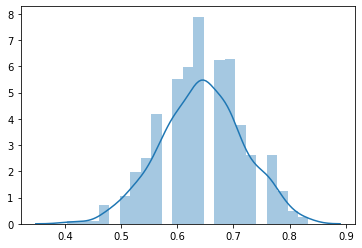

In [153]:
rand_score = np.array(rand_score)
print("Area under curve: %0.2f (+/- %0.2f)" % (np.mean(rand_score), np.std(rand_score) * 2))
print(f'90% CI is {np.quantile(rand_score, [0.05, 0.95])}')
sns.distplot(rand_score)

In [155]:
score, permutation_scores, pvalue = permutation_test_score(
    model, X, condition_label, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1, verbose=5)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


Classification score 0.619047619047619 (pvalue : 0.3069306930693069)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.3s finished


In [ ]:
img_ket = masker.inverse_transform(np.mean(ketArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_ket, threshold=1, display_mode='ortho', draw_cross=False, 
                          cut_coords=[-27,-20,-14], colorbar=True, vmax=40)

In [ ]:
img_mid = masker.inverse_transform(np.mean(midArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_mid, threshold=1, display_mode='ortho', draw_cross=False, 
                          cut_coords=[-27,-20,-14], colorbar=True,  vmax=40)

In [ ]:
#plt.figure(figsize=(30,10))
sns.heatmap(ketArr_reshape, cmap="coolwarm", vmax=200, vmin = -200)
plt.title("Ketamine Pattern")
plt.show()
#plt.figure(figsize=(30,10))
sns.heatmap(midArr_reshape, cmap="coolwarm", vmax=200, vmin = -200)
plt.title("Midazolam Pattern")
plt.show()


In [ ]:
tTestArr = scipy.stats.ttest_ind(ketArr_reshape, midArr_reshape,  equal_var=True, nan_policy='propagate')
plt.figure(figsize=(40,10))
sns.heatmap([tTestArr[0]], cmap="coolwarm")

In [ ]:
# turn back to brain?
img = masker.inverse_transform(tTestArr[0]) # turn the t array back to brain image
nilearn.plotting.plot_stat_map(img, display_mode='x', threshold=1.3) # stat plot everything beyond threshold
#nilearn.plotting.plot_img(img, threshold=.001, display_mode='z') # just plot the ROI image
# one interactive plot - so we can play with locations
#view = plotting.view_img(img, threshold=2, title="Ketamine - Midazolam Hippocampus")
#view


## Striatum

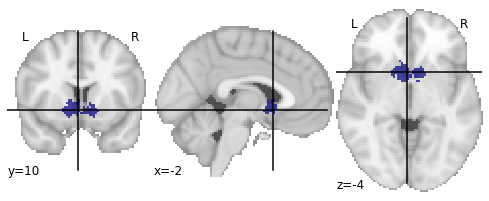

In [188]:
mask_file = '/media/Data/work/KPE_ROI/binConjunc_PvNxDECxRECxMONxPRI_striatum.nii.gz'
mask_file = nilearn.image.math_img("a>=0.001", a=mask_file)
%matplotlib inline
nilearn.plotting.plot_roi(mask_file)
masker = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                               sessions=None, smoothing_fwhm=4, standardize=False, detrend=False, verbose=5)

In [189]:
ketamine = []
for func in ket_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    ketamine.append(beta)

midazolam = []
for func in mid_func:
    print(f'Running {func}')
    beta = masker.fit_transform(func)
    midazolam.append(beta)

ketArr = np.array(ketamine)
ketArr_reshape= np.array(ketArr).reshape(ketArr.shape[0], ketArr.shape[2])
ketArr_reshape.shape


midArr = np.array(midazolam)
midArr_reshape= np.array(midArr).reshape(midArr.shape[0], midArr.shape[2])
midArr_reshape.shape


## Create condition labels (1 = plus, 0 = minus)
label1 = [1] * ketArr.shape[0]
label2 = [0] * midArr.shape[0]
condition_label = np.concatenate([label1, label2])
condition_label

X = np.concatenate([ketArr, midArr])
X = X.reshape(X.shape[0], midArr_reshape.shape[1])
X.shape

Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_008/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1223/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mas

[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1356/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(97, 115, 97, 1),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,  
[NiftiMasker.transform_single_imgs] Resampling images
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Running /media/Data/Lab_Projects/KPE_PTSD_Project/neuroimaging/KPE_results/work/fsl_analysis_ses3/modelfit/_subject_id_1364/modelestimate/mapflow/_modelestimate0/results/cope2.nii.gz
[NiftiMas

(17, 500)

In [158]:
n_iter = 1000
rand_score = []
for i in range(n_iter):
    print(f' Running {i+1} iteration')
    mean_scores = []
    scores = cross_val_score(model,
                            X,
                            y=condition_label,
                            cv=cv,
                            groups=condition_label,
                            scoring= "accuracy",
                            n_jobs=1, # set number of CPUs
                            #verbose = 5 # set some details of the activity 
                            )
    mean_scores.append(scores.mean())
    rand_score.append(mean_scores)

 Running 1 iteration
 Running 2 iteration
 Running 3 iteration
 Running 4 iteration
 Running 5 iteration
 Running 6 iteration
 Running 7 iteration
 Running 8 iteration
 Running 9 iteration
 Running 10 iteration
 Running 11 iteration
 Running 12 iteration
 Running 13 iteration
 Running 14 iteration
 Running 15 iteration
 Running 16 iteration
 Running 17 iteration
 Running 18 iteration
 Running 19 iteration
 Running 20 iteration
 Running 21 iteration
 Running 22 iteration
 Running 23 iteration
 Running 24 iteration
 Running 25 iteration
 Running 26 iteration
 Running 27 iteration
 Running 28 iteration
 Running 29 iteration
 Running 30 iteration
 Running 31 iteration
 Running 32 iteration
 Running 33 iteration
 Running 34 iteration
 Running 35 iteration
 Running 36 iteration
 Running 37 iteration
 Running 38 iteration
 Running 39 iteration
 Running 40 iteration
 Running 41 iteration
 Running 42 iteration
 Running 43 iteration
 Running 44 iteration
 Running 45 iteration
 Running 46 iterati

 Running 364 iteration
 Running 365 iteration
 Running 366 iteration
 Running 367 iteration
 Running 368 iteration
 Running 369 iteration
 Running 370 iteration
 Running 371 iteration
 Running 372 iteration
 Running 373 iteration
 Running 374 iteration
 Running 375 iteration
 Running 376 iteration
 Running 377 iteration
 Running 378 iteration
 Running 379 iteration
 Running 380 iteration
 Running 381 iteration
 Running 382 iteration
 Running 383 iteration
 Running 384 iteration
 Running 385 iteration
 Running 386 iteration
 Running 387 iteration
 Running 388 iteration
 Running 389 iteration
 Running 390 iteration
 Running 391 iteration
 Running 392 iteration
 Running 393 iteration
 Running 394 iteration
 Running 395 iteration
 Running 396 iteration
 Running 397 iteration
 Running 398 iteration
 Running 399 iteration
 Running 400 iteration
 Running 401 iteration
 Running 402 iteration
 Running 403 iteration
 Running 404 iteration
 Running 405 iteration
 Running 406 iteration
 Running 40

 Running 721 iteration
 Running 722 iteration
 Running 723 iteration
 Running 724 iteration
 Running 725 iteration
 Running 726 iteration
 Running 727 iteration
 Running 728 iteration
 Running 729 iteration
 Running 730 iteration
 Running 731 iteration
 Running 732 iteration
 Running 733 iteration
 Running 734 iteration
 Running 735 iteration
 Running 736 iteration
 Running 737 iteration
 Running 738 iteration
 Running 739 iteration
 Running 740 iteration
 Running 741 iteration
 Running 742 iteration
 Running 743 iteration
 Running 744 iteration
 Running 745 iteration
 Running 746 iteration
 Running 747 iteration
 Running 748 iteration
 Running 749 iteration
 Running 750 iteration
 Running 751 iteration
 Running 752 iteration
 Running 753 iteration
 Running 754 iteration
 Running 755 iteration
 Running 756 iteration
 Running 757 iteration
 Running 758 iteration
 Running 759 iteration
 Running 760 iteration
 Running 761 iteration
 Running 762 iteration
 Running 763 iteration
 Running 76

Area under curve: 0.62 (+/- 0.18)
90% CI is [0.47619048 0.76190476]


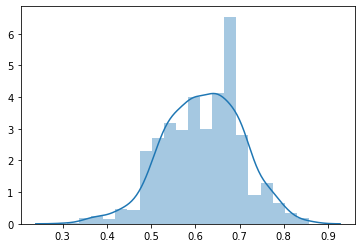

In [159]:
rand_score = np.array(rand_score)
print("Area under curve: %0.2f (+/- %0.2f)" % (np.mean(rand_score), np.std(rand_score) * 2))
print(f'90% CI is {np.quantile(rand_score, [0.05, 0.95])}')
sns.distplot(rand_score)

In [160]:
score, permutation_scores, pvalue = permutation_test_score(
    model, X, condition_label, scoring="accuracy", cv=cv, n_permutations=500, n_jobs=1, verbose=5)

print("Classification score %s (pvalue : %s)" % (score, pvalue))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


Classification score 0.6428571428571429 (pvalue : 0.2714570858283433)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   47.0s finished


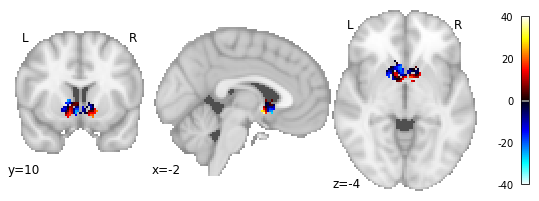

In [190]:
img_ket = masker.inverse_transform(np.mean(ketArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_ket, threshold=1, display_mode='ortho', draw_cross=False, 
                          cut_coords=[-2,10,-4], colorbar=True, vmax=40)

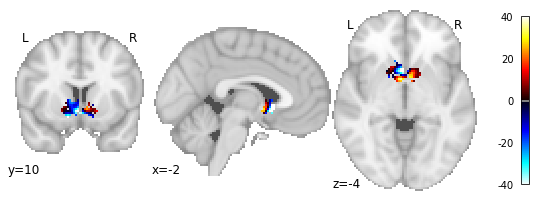

In [191]:
img_mid= masker.inverse_transform(np.mean(midArr_reshape, axis=0))
nilearn.plotting.plot_stat_map(img_mid, threshold=1, display_mode='ortho', draw_cross=False, 
                          cut_coords=[-2,10,-4], colorbar=True, vmax=40)

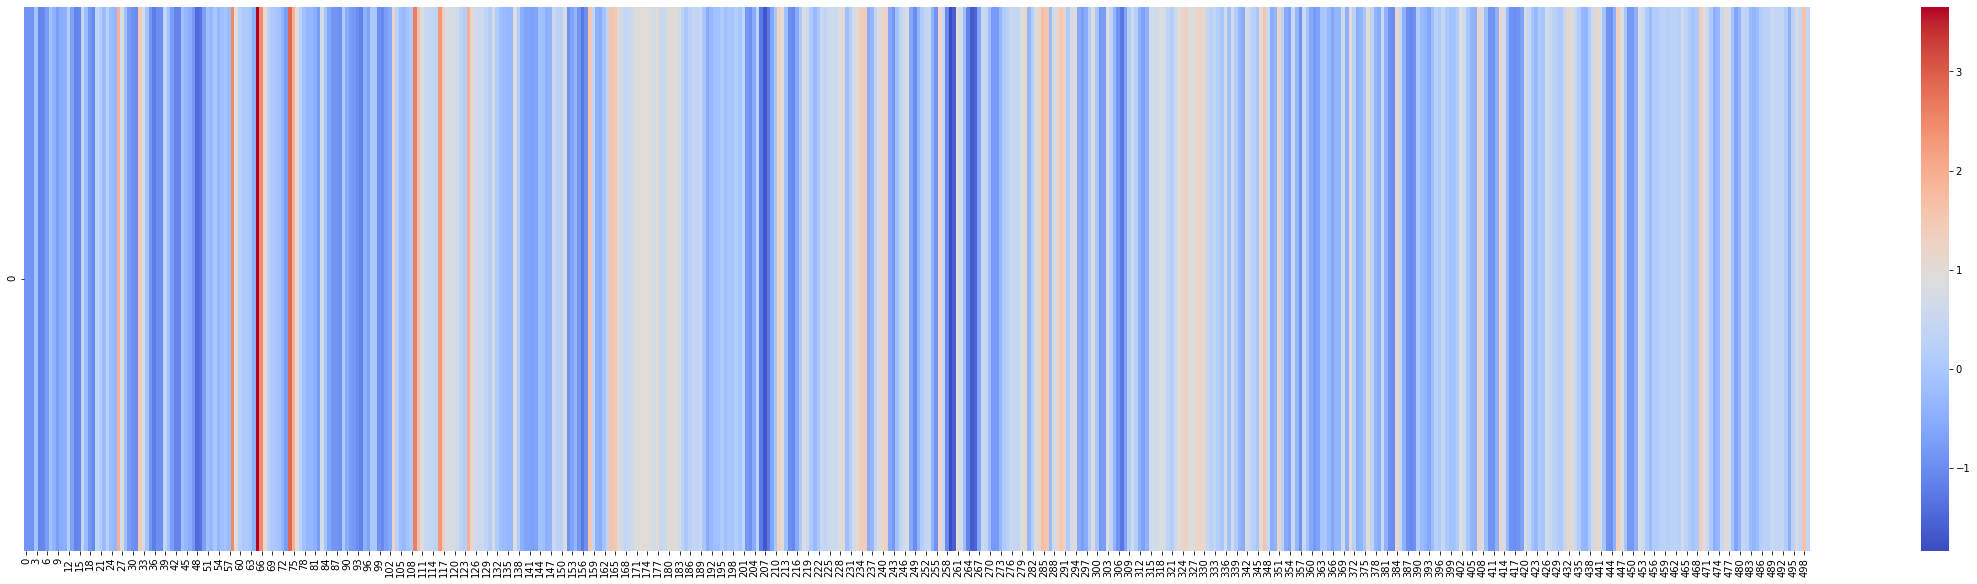

In [192]:
tTestArr = scipy.stats.ttest_ind(ketArr_reshape, midArr_reshape,  equal_var=True, nan_policy='propagate')
plt.figure(figsize=(40,10))
sns.heatmap([tTestArr[0]], cmap="coolwarm")

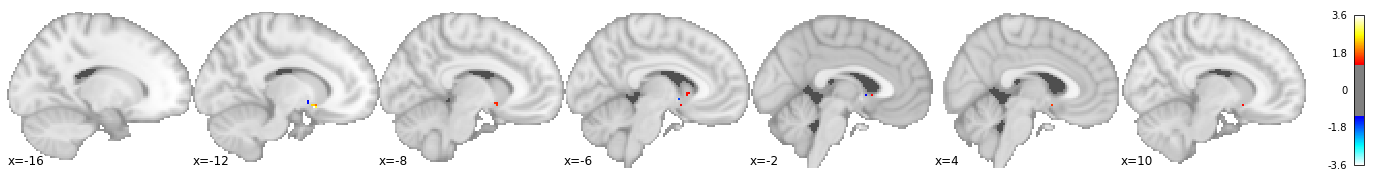

In [193]:
img = masker.inverse_transform(tTestArr[0]) # turn the t array back to brain image
nilearn.plotting.plot_stat_map(img, display_mode='x', threshold=1.3) # stat plot everything beyond threshold

## We need to run permutation test to see if the values we get are actually different than something we might randomly get

In [ ]:
# organize labels of group and vector for each

# start shuffle the group and see how many times we get such a difference

## Using the t-tests and FDR to see what survives

In [182]:
# First simple t test like we did befor
tTestArr = scipy.stats.ttest_ind(ketArr_reshape, midArr_reshape,  equal_var=True, nan_policy='propagate')
tTestArr

Ttest_indResult(statistic=array([ 0.41356513, -0.18528277, -2.0933478 , ..., -0.79962456,
       -0.91735995, -1.1412845 ], dtype=float32), pvalue=array([0.6850448 , 0.85548933, 0.05372314, ..., 0.43640887, 0.3734689 ,
       0.27164508]))

In [184]:
# use fdr correction for multiple comparisons
from statsmodels.stats import multitest
# we need to reshape the test p-values array to create 1D array
alpha = .1 # set p value
fdr_mat = multitest.multipletests(tTestArr[1], alpha=alpha, method='fdr_bh', is_sorted=False, returnsorted=False)
print(f'Number of significant voxels is {np.sum(fdr_mat[0])}')

Number of significant voxels is 1


In [185]:
# threshold the t array 
corr_mat_thrFDR = np.array(tTestArr[0])
corr_mat_thrFDR[fdr_mat[0]==False] = 0
# now we can turn it back to brain image and plot 
fdr_img = masker.inverse_transform(corr_mat_thrFDR)
  

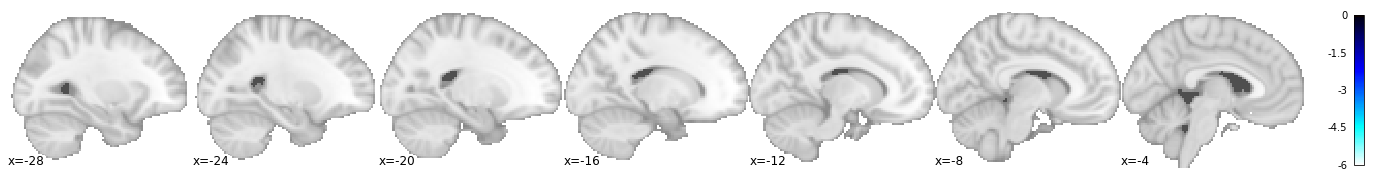

In [187]:
nilearn.plotting.plot_stat_map(fdr_img, display_mode='x')